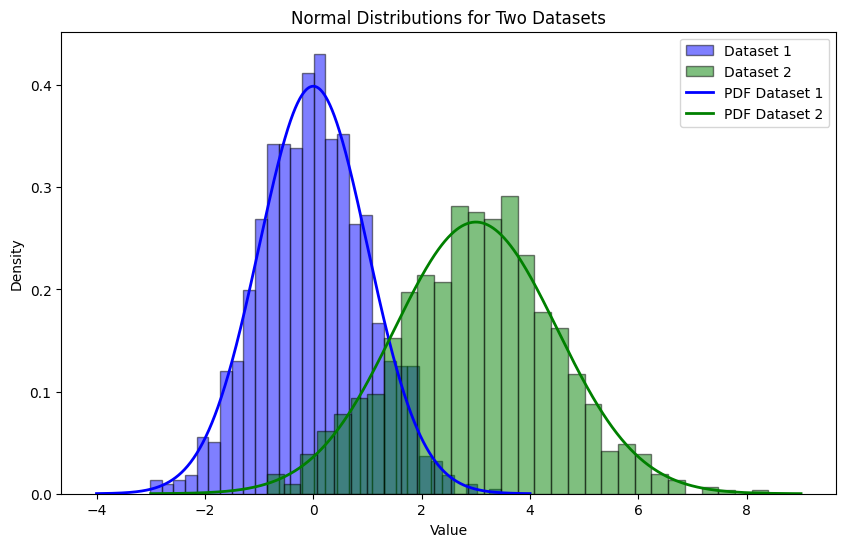

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for Dataset 1
mean1 = 0        # Mean of Dataset 1
std_dev1 = 1     # Standard deviation of Dataset 1
num_samples1 = 1000  # Number of samples for Dataset 1

# Define parameters for Dataset 2
mean2 = 3        # Mean of Dataset 2
std_dev2 = 1.5   # Standard deviation of Dataset 2
num_samples2 = 1000  # Number of samples for Dataset 2

# Generate data
data1 = np.random.normal(mean1, std_dev1, num_samples1)
data2 = np.random.normal(mean2, std_dev2, num_samples2)

# Plot histograms for both datasets
plt.figure(figsize=(10, 6))
bins = 30  # Number of bins for the histograms

# Histogram for Dataset 1
plt.hist(data1, bins=bins, density=True, alpha=0.5, color='blue', edgecolor='black', label='Dataset 1')

# Histogram for Dataset 2
plt.hist(data2, bins=bins, density=True, alpha=0.5, color='green', edgecolor='black', label='Dataset 2')

# Overlay the probability density functions (PDFs)
x1 = np.linspace(mean1 - 4 * std_dev1, mean1 + 4 * std_dev1, 1000)
pdf1 = (1 / (std_dev1 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x1 - mean1) / std_dev1) ** 2)
plt.plot(x1, pdf1, color='blue', linewidth=2, label='PDF Dataset 1')

x2 = np.linspace(mean2 - 4 * std_dev2, mean2 + 4 * std_dev2, 1000)
pdf2 = (1 / (std_dev2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x2 - mean2) / std_dev2) ** 2)
plt.plot(x2, pdf2, color='green', linewidth=2, label='PDF Dataset 2')

# Add title, labels, and legend
plt.title('Normal Distributions for Two Datasets')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()


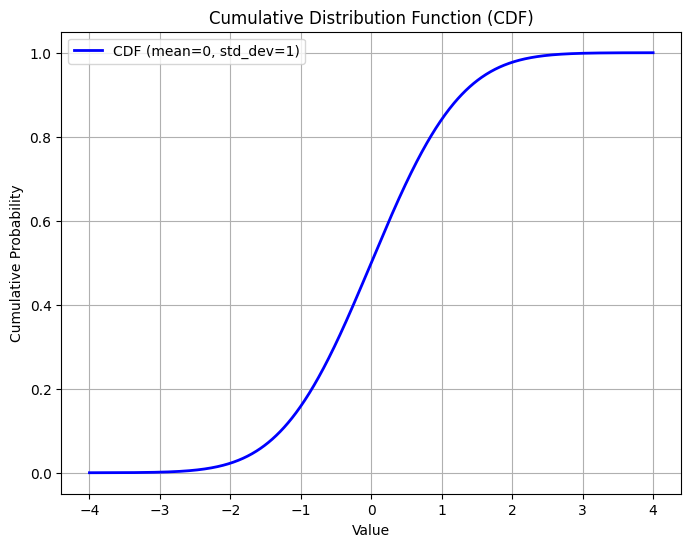

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Modifiable parameters
mean = 0       # Mean of the normal distribution
std_dev = 1    # Standard deviation of the normal distribution
n_points = 1000  # Number of points for the CDF plot

# Generate x values for the normal distribution
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, n_points)

# Calculate the CDF using scipy's norm.cdf function
cdf = norm.cdf(x, loc=mean, scale=std_dev)

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(x, cdf, color='blue', linewidth=2, label=f'CDF (mean={mean}, std_dev={std_dev})')

# Add title and labels
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()

# Show the plot
plt.grid()
plt.show()


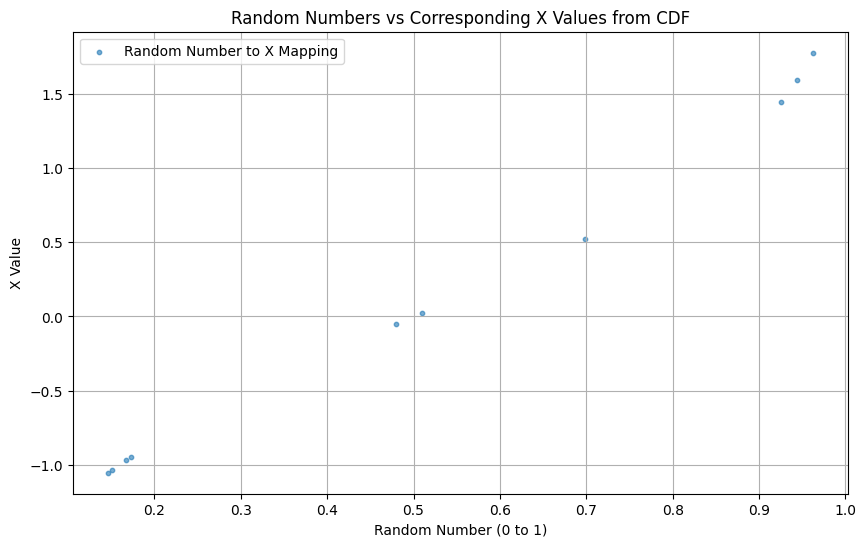

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to look up x value from a random number using the CDF
def lookup_x_from_cdf(random_number, mean, std_dev, n_points=1000):
    """
    Given a random number (0 to 1) and a CDF, returns the corresponding x value.

    :param random_number: A random number between 0 and 1
    :param mean: Mean of the normal distribution
    :param std_dev: Standard deviation of the normal distribution
    :param n_points: Number of points for the CDF generation
    :return: The x value corresponding to the random number
    """
    if not 0 <= random_number <= 1:
        raise ValueError("random_number must be between 0 and 1.")

    # Generate x values for the normal distribution
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, n_points)

    # Calculate the CDF
    cdf = norm.cdf(x, loc=mean, scale=std_dev)

    # Interpolate to find the x value corresponding to the random number
    x_value = np.interp(random_number, cdf, x)
    return x_value

# Parameters for the normal distribution
mean = 0       # Mean of the normal distribution
std_dev = 1    # Standard deviation
n_points = 1000
num_samples = 1000  # Number of pairs to generate

# Generate random numbers and corresponding x values
random_numbers = np.random.rand(num_samples)
x_values = [lookup_x_from_cdf(rand, mean, std_dev, n_points) for rand in random_numbers]

# Create pairs
pairs = list(zip(random_numbers, x_values))

# Plot the pairs
plt.figure(figsize=(10, 6))
plt.scatter(random_numbers, x_values, alpha=0.6, s=10, label='Random Number to X Mapping')
plt.title('Random Numbers vs Corresponding X Values from CDF')
plt.xlabel('Random Number (0 to 1)')
plt.ylabel('X Value')
plt.legend()
plt.grid()
plt.show()

In [8]:
pairs

[(np.float64(0.14643763414650257), np.float64(-1.0518393153565426)),
 (np.float64(0.47996041929147715), np.float64(-0.05025319515165399)),
 (np.float64(0.6984627655173887), np.float64(0.5199884667285419)),
 (np.float64(0.16710256307028504), np.float64(-0.965680931221107)),
 (np.float64(0.9258244714401435), np.float64(1.4453808023713046)),
 (np.float64(0.9439107434536445), np.float64(1.5884830977351536)),
 (np.float64(0.5098403490577977), np.float64(0.024668788185624284)),
 (np.float64(0.17238814695959137), np.float64(-0.944777593478686)),
 (np.float64(0.15056308754715464), np.float64(-1.0340291416206633)),
 (np.float64(0.9620215010817225), np.float64(1.7746476379565035))]

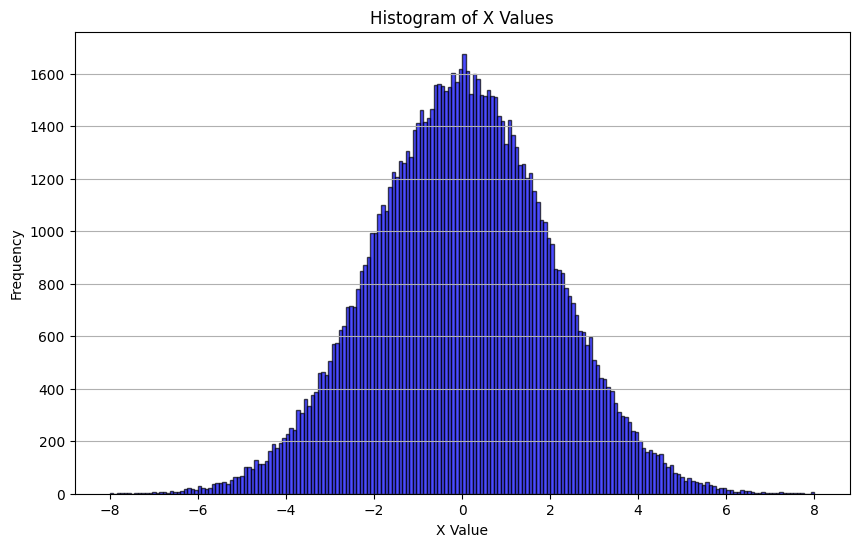

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to look up x value from a random number using the CDF
def lookup_x_from_cdf(random_number, mean, std_dev, n_points=1000):
    if not 0 <= random_number <= 1:
        raise ValueError("random_number must be between 0 and 1.")
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, n_points)
    cdf = norm.cdf(x, loc=mean, scale=std_dev)
    return np.interp(random_number, cdf, x)

# Parameters
mean = 0       # Mean of the normal distribution
std_dev = 2    # Standard deviation
num_samples = 100000  # Number of samples
num_bins = 200       # Number of bins for the histogram

# Generate random numbers and corresponding x values
random_numbers = np.random.rand(num_samples)
x_values = [lookup_x_from_cdf(rand, mean, std_dev) for rand in random_numbers]

# Plot the histogram of x values
plt.figure(figsize=(10, 6))
plt.hist(x_values, bins=num_bins, density=False, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Histogram of X Values')
plt.xlabel('X Value')
plt.ylabel('Frequency')

# Show the plot
plt.grid(axis='y')
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for Dataset 1
mean1 = 0        # Mean of Dataset 1
std_dev1 = 1     # Standard deviation of Dataset 1
num_samples1 = 10  # Number of samples for Dataset 1

# Define parameters for Dataset 2
mean2 = 3        # Mean of Dataset 2
std_dev2 = 1.5   # Standard deviation of Dataset 2
num_samples2 = 5  # Number of samples for Dataset 2

# Generate data
data1 = np.random.normal(mean1, std_dev1, num_samples1)
data2 = np.random.normal(mean2, std_dev2, num_samples2)

data1

array([ 2.15731136,  0.33389523,  2.7730494 ,  1.28632765, -1.65857057,
       -1.54214287,  0.40263205,  1.98924413,  1.80531682, -0.46658477])

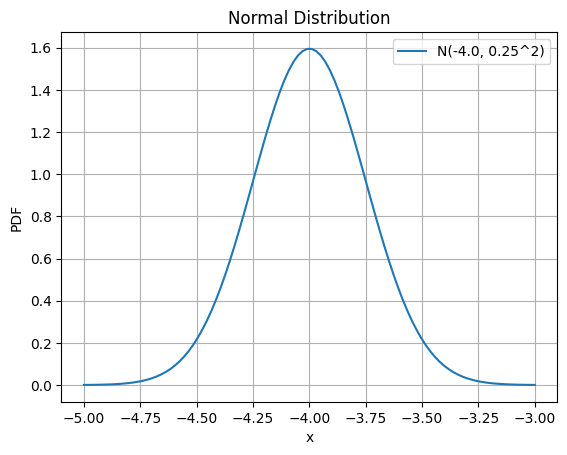

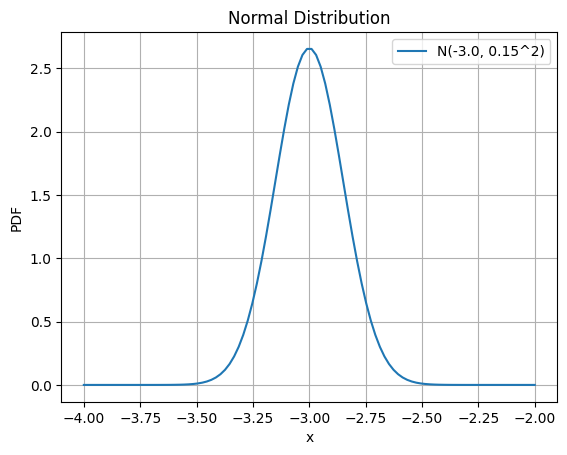

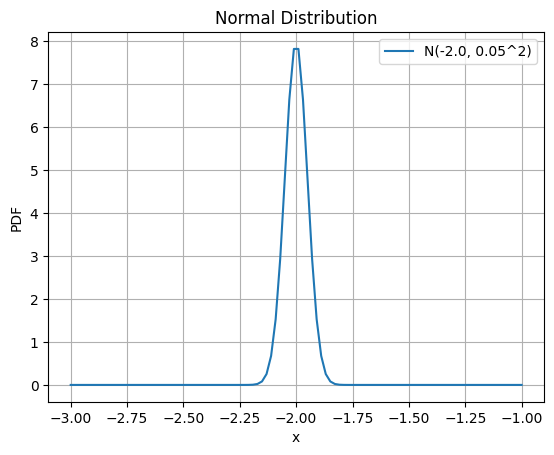

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def normal_pdf(x, mu, sigma):
    """Return the value of the normal distribution PDF 
    with mean mu and standard deviation sigma at x."""
    return (1.0 / (sigma * math.sqrt(2.0 * math.pi))) * \
           math.exp(-0.5 * ((x - mu) / sigma)**2)

class Dist:
    def __init__(self, start, end, num_points, mu, sigma):
        self.start = start              # start of range
        self.end = end                  # end of range
        self.num_points = num_points    # how many points you want in [a, b]
        self.mu = mu                    # mean of the normal distribution
        self.sigma = sigma              # standard deviation
        self.x_values = np.linspace(start, end, num_points)
        self.y_values = [normal_pdf(x, mu, sigma) for x in self.x_values]
        self.xy_pairs = list(zip(self.x_values, self.y_values))

dists = []
# Dist(start, end, num_points, mu, sigma)
dists.append(Dist(-5.0, -3.0, 100, -4.0, 0.25))
dists.append(Dist(-4.0, -2.0, 100, -3.0, 0.15))
dists.append(Dist(-3.0, -1.0, 100, -2.0, 0.05))

for dist in dists:
    plt.plot(dist.x_values, dist.y_values, label=f"N({dist.mu}, {dist.sigma}^2)")
    plt.title("Normal Distribution")
    plt.xlabel("x")
    plt.ylabel("PDF")
    plt.legend()
    plt.grid(True)
    plt.show()


In [2]:
summariesOfAds = []

totalNumAds = 1000000
for dist in dists:
    area = 0
    for pair in dist.xy_pairs:
        area += pair[1]
    
    for pair in dist.xy_pairs:
        
        x = pair[0]
        y = pair[1] / area
        totalAdsInSlice = y * totalNumAds
        
        pLinear = pow(10,x)
        nLabel1 = pLinear * totalAdsInSlice
        nLabel2 = totalAdsInSlice - nLabel1

        summariesOfAds.append((pLinear, nLabel1, nLabel2))
    
summariesOfAds

[(np.float64(1e-05),
  np.float64(0.00010815138086906845),
  np.float64(10.815029935525974)),
 (np.float64(1.047615752789664e-05),
  np.float64(0.00015602498290350045),
  np.float64(14.893184638139648)),
 (np.float64(1.0974987654930568e-05),
  np.float64(0.00022362497189657254),
  np.float64(20.375650947981075)),
 (np.float64(1.1497569953977357e-05),
  np.float64(0.0003184274762954788),
  np.float64(27.69487956393276)),
 (np.float64(1.2045035402587812e-05),
  np.float64(0.0004504689396187238),
  np.float64(37.39827228798502)),
 (np.float64(1.2618568830660211e-05),
  np.float64(0.0006331159402655059),
  np.float64(50.17272241762708)),
 (np.float64(1.3219411484660286e-05),
  np.float64(0.000884027399057288),
  np.float64(66.87254676663495)),
 (np.float64(1.3848863713938746e-05),
  np.float64(0.0012263439232848702),
  np.float64(88.55072626505265)),
 (np.float64(1.4508287784959402e-05),
  np.float64(0.0016901409405709622),
  np.float64(116.49316890942336)),
 (np.float64(1.5199110829529332

In [5]:
crossEntropy = 0
sumLabel1 = 0
sumLabel2 = 0
for summary in summariesOfAds:
    p = summary[0]
    nLabel1 = summary[1]
    nLabel2 = summary[2]
    
    if nLabel1 > 0:
        crossEntropy -= nLabel1 * math.log(p)
        sumLabel1 += nLabel1
    if nLabel2 > 0:
        crossEntropy -= nLabel2 * math.log(1-p)
        sumLabel2 += nLabel2
        
realProb = sumLabel1 / (sumLabel1 + sumLabel2)

normalizedCrossEntropy = crossEntropy / (-sumLabel1 * math.log(realProb) - sumLabel2 * math.log(1-realProb))
print(realProb, crossEntropy, normalizedCrossEntropy)


0.0037486499326493013 65671.70079102187 0.8868709971046181
